In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
#import data/csv file
file = 'myopia.csv'
df = pd.read_csv(file)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df.shape

(618, 15)

In [4]:
#Prepare data
X = df.drop(['MYOPIC'], axis=1)
y = df['MYOPIC']

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [6]:
x_scaled.shape

(618, 14)

In [7]:
pca = PCA(n_components = 0.9)
df_pca = pca.fit_transform(x_scaled)
df_pca.shape

(618, 10)

In [8]:
#df_myopia_pca = pd.DataFrame(
 #   data = df_pca, columns = ["principal component 1","principal component 2","principal component 3"])

In [9]:
#df_myopia_pca.head()

In [10]:
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [11]:
# # Initialize the K-Means model
# model = KMeans(n_clusters=3, random_state=0)

# # Fit the model
# model.fit(df_myopia_pca)

# # Predict clusters
# predictions = model.predict(df_myopia_pca)

# # Add the predicted class columns
# df_myopia_pca['class'] = model.labels_
# df_myopia_pca.head()

In [12]:
# import plotly.express as px
# fig = px.scatter_3d(
#     df_myopia_pca,
#     x="principal component 3",
#     y="principal component 2",
#     z="principal component 1",
#     color = "class",
#     symbol="class",
#     width= 800)

# fig.update_layout(legend=dict(x=0, y=1))
# fig.show()


In [13]:
# #Scale the data
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_myopia_pca)

In [14]:
#run t-NSE
tsne = TSNE(perplexity = 50)
tsne_features = tsne.fit_transform(df_pca)

/Users/brandongroenewold/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/brandongroenewold/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [15]:
# check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

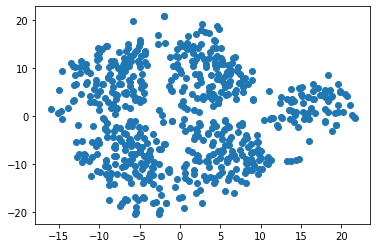

In [16]:
#plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [21]:
# labels = y

In [22]:
# #Results colored by target value
# plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
# plt.show()

In [19]:
inertia = []
k = list(range(1,11))

#Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)
    
# Create the Elbow curve using hvPlot
elbow_data = {"k":k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


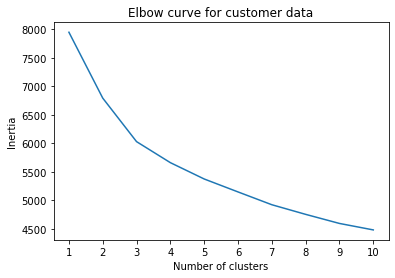

In [20]:
# Plot the elbow curve to find the best candidates(s) for k
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow curve for customer data")
plt.show()

According to the tsne graph above this one it looks like the patients can be clusted into five groups.